# Qiskit Installation and Verification

This Jupiter Notebook is designed to check whether Qiskit is installed on the system. If Qiskit is not found, this notebook provides step-by-step instructions on how to install and verify the installation of Qiskit.

## Checking if Qiskit is Installed

The following code tells you about the version number of any *Qiskit* library that is already installed in your system.

In [8]:
import qiskit
versions = qiskit.__qiskit_version__
print("The version of Qiskit is",versions['qiskit'])
print()
print("The version of each component:")
for key in versions:
    print(key,"->",versions[key])

The version of Qiskit is 0.43.1

The version of each component:
qiskit-terra -> 0.24.1
qiskit-aer -> 0.12.0
qiskit-ignis -> None
qiskit-ibmq-provider -> 0.20.2
qiskit -> 0.43.1
qiskit-nature -> None
qiskit-finance -> None
qiskit-optimization -> None
qiskit-machine-learning -> None


## Qiskit Installation

#### Make sure to restart the kernel after executing the following command to apply the changes to the current norebook.

In [9]:
!pip install "qiskit[visualization]" --user --upgrade

<hr id="tips">

### Tips

_Any terminal/shell command can be executed in the notebook cells by putting an exclamation mark (!) at the beginning of the command._

_$\rightarrow$ To update Qiskit to the latest version, execute the following command in a code cell_

    !pip install -U qiskit --user
    
_$\rightarrow$ To uninstall Qiskit, execute the following command in a code cell_

    !pip uninstall qiskit

## Executing an Example

At this point, you do not need to scratch your head over what's going on in the following code. It is just testing whether qiskit is perfectly installed on not. 
### 1) Creating a Quantum Circuit

If you see *"The execution of the cell was completed, and the circuit was created :)"* after execution of the following code then proceed forward. If not then there is something wrong with either qiskit installation or the following code has been damadged. In principle, if you followed the above stpes, the following code should work.

In [10]:
# import the objects from qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# create a quantum circuit and its register objects
qreg = QuantumRegister(2) # quantum register with two quantum bits
creg = ClassicalRegister(2) # classical register with two classical bit
circuit = QuantumCircuit(qreg,creg) # quantum circuit composed by a quantum register and a classical register

# apply a Hadamard gate to the first qubit
circuit.h(qreg[0])

# set the second qubit to state |1>
circuit.x(qreg[1])

# apply CNOT(first_qubit,second_qubit)
circuit.cx(qreg[0],qreg[1])

# measure the both qubits
circuit.measure(qreg,creg)

print("The execution of the cell was completed, and the circuit was created :)")

The execution of the cell was completed, and the circuit was created :)


### 2) Drawing the Circuit
Run the cell once more if you do not see the following figure after execution. <img src="files/Graphics/InstallationExample.png" width="300" height="500">

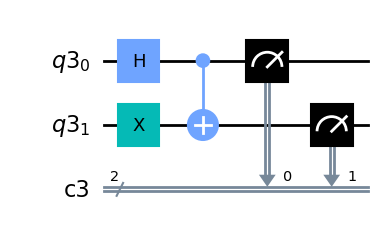

In [12]:
# draw circuit 
circuit.draw(output='mpl')

# the output will be a "matplotlib.Figure" object

### 3) Executing Circuit in Local Simulator
Execute the circuit 1024 times in the local simulator and print the observed the outcomes


In [14]:
## execute the circuit 1024 times
job = execute(circuit,Aer.get_backend('qasm_simulator'),shots=1024)
# get the result
counts = job.result().get_counts(circuit)
print(counts)

{'01': 517, '10': 507}
